# Лабораторная 5 - Деревья решений, Фида А.Д. 6135

Ссылка на датасет: https://www.kaggle.com/fabdelja/autism-screening-for-toddlers

Autism data for infants classification

Attributes:
A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('data/toddler.csv', index_col='Case_No')
df0.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
Case_No                                                                      
1         0   0   0   0   0   0   1   1   0    1        28               3   
2         1   1   0   0   0   1   1   0   0    0        36               4   
3         1   0   0   0   0   0   1   1   0    1        36               4   
4         1   1   1   1   1   1   1   1   1    1        24              10   
5         1   1   0   1   1   1   1   1   1    1        20               9   

        Sex       Ethnicity Jaundice Family_mem_with_ASD  \
Case_No                                                    
1         f  middle eastern      yes                  no   
2         m  White European      yes                  no   
3         m  middle eastern      yes                  no   
4         m        Hispanic       no                  no   
5         f  White European       no                 yes   

        Who completed the test  ASD  
Case_No                              
1                family member   No  
2                family member  Yes  
3                family member  Yes  
4                family member  Yes  
5                family member  Yes

In [3]:
len(df0)

1054

In [4]:
target = df0['ASD']
target = pd.factorize(target)[0]
df0 = df0.drop(columns=['ASD'])

# 1. KNN

In [5]:
# выбрасываем столбцы, которые будем переделывать в бинарные
df = df0.drop(columns=['Ethnicity', 'Who completed the test'])

In [6]:
# 1. Преобразовываем категориальные признаки в бинарные
one_hot = pd.get_dummies(df0[['Ethnicity', 'Who completed the test']],drop_first=True)

### 1.0 Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [7]:
df['Sex'] = pd.factorize(df0['Sex'])[0]
df['Jaundice'] = pd.factorize(df0['Jaundice'])[0]
df['Family_mem_with_ASD'] = pd.factorize(df0['Family_mem_with_ASD'])[0]

In [8]:
df = pd.concat([df, one_hot], axis=1)
df.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  \
Case_No                                           ...   
1         0   0   0   0   0   0   1   1   0    1  ...   
2         1   1   0   0   0   1   1   0   0    0  ...   
3         1   0   0   0   0   0   1   1   0    1  ...   
4         1   1   1   1   1   1   1   1   1    1  ...   
5         1   1   0   1   1   1   1   1   1    1  ...   

         Ethnicity_White European  Ethnicity_asian  Ethnicity_black  \
Case_No                                                               
1                               0                0                0   
2                               1                0                0   
3                               0                0                0   
4                               0                0                0   
5                               1                0                0   

         Ethnicity_middle eastern  Ethnicity_mixed  Ethnicity_south asian  \
Case_No                                                                     
1                               1                0                      0   
2                               0                0                      0   
3                               1                0                      0   
4                               0                0                      0   
5                               0                0                      0   

         Who completed the test_Health care professional  \
Case_No                                                    
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
5                                                      0   

         Who completed the test_Others  Who completed the test_Self  \
Case_No                                                               
1                                    0                            0   
2                                    0                            0   
3                                    0                            0   
4                                    0                            0   
5                                    0                            0   

         Who completed the test_family member  
Case_No                                        
1                                           1  
2                                           1  
3                                           1  
4                                           1  
5                                           1  

[5 rows x 29 columns]

In [9]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df, target, test_size=0.3, random_state=21)

### 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализовапнного датасета KNeighborsClassifier (без использования конвееров)

In [10]:
# Нормализация с использованием StandardScaler и KNN
scaler = StandardScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_holdout_n = scaler.transform(X_holdout)

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [12]:
# Конвейер 
knn_pip = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

### 1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [13]:
# 4. Подбор гиперпараметра
knn_params = { 'n_neighbors': range(1, 10) }

knn_grid = GridSearchCV(knn, knn_params, cv=7)
knn_grid.fit(X_train_n, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)})

In [14]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 9}, 0.9443588756257222)

In [15]:
accuracy_score(y_holdout, knn_grid.best_estimator_.predict(X_holdout_n))

0.9274447949526814

In [16]:
# То же самое, но с конвейером
knn_params = { 'knn__n_neighbors': range(1, 10) }

knn_grid_pip = GridSearchCV(knn_pip, knn_params, cv=7)
knn_grid_pip.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 10)})

In [17]:
knn_grid_pip.best_params_, knn_grid_pip.best_score_

({'knn__n_neighbors': 9}, 0.9443588756257222)

In [18]:
accuracy_score(y_holdout, knn_grid_pip.predict(X_holdout))

0.9274447949526814

# 2. Decision Tree

### 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [19]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, y_pred)

1.0

### 2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [20]:
tree = DecisionTreeClassifier()
tree_params = {'max_depth' : range(1, 10), 'max_features' : range(5, 20), 'criterion' : ['gini', 'entropy']}
tree_grid = GridSearchCV(tree, tree_params, cv=7)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(5, 20)})

In [21]:
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'gini', 'max_depth': 3, 'max_features': 14}, 1.0)

In [22]:
best_tree = tree_grid.best_estimator_

In [23]:
accuracy_score(y_holdout, best_tree.predict(X_holdout))

1.0

### 2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

Text(0, 0.5, 'Feature')

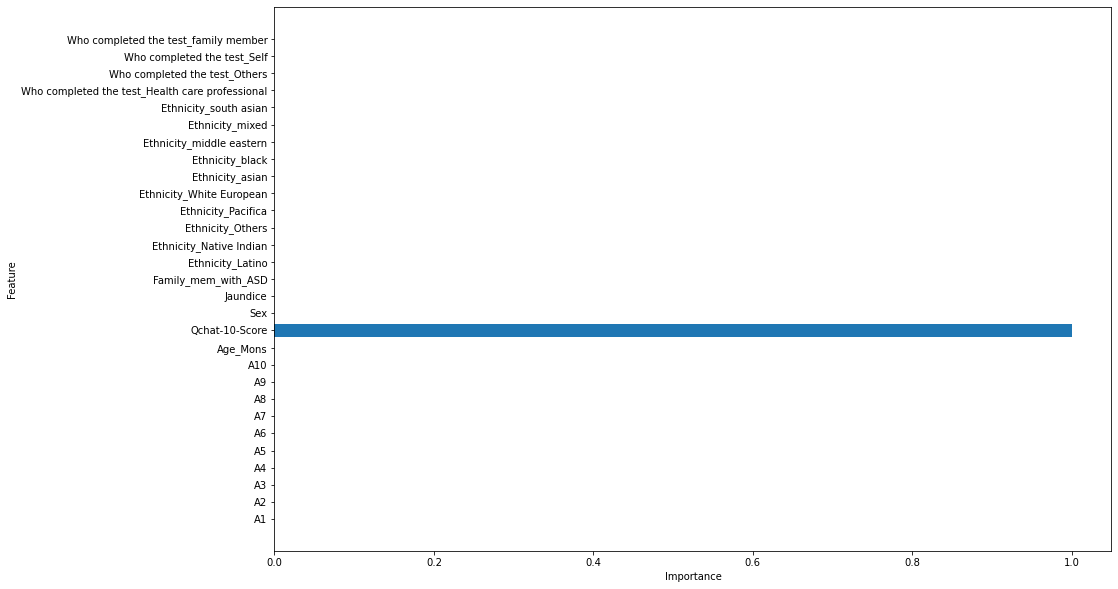

In [24]:
n_features = df.shape[1]
plt.figure(figsize=(15,10))
plt.barh(range(n_features), best_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), df.columns)
plt.xlabel("Importance")
plt.ylabel("Feature")

In [25]:
for name, score in zip(df.columns, best_tree.feature_importances_):
    print(name, ':', score)

A1 : 0.0
A2 : 0.0
A3 : 0.0
A4 : 0.0
A5 : 0.0
A6 : 0.0
A7 : 0.0
A8 : 0.0
A9 : 0.0
A10 : 0.0
Age_Mons : 0.0
Qchat-10-Score : 1.0
Sex : 0.0
Jaundice : 0.0
Family_mem_with_ASD : 0.0
Ethnicity_Latino : 0.0
Ethnicity_Native Indian : 0.0
Ethnicity_Others : 0.0
Ethnicity_Pacifica : 0.0
Ethnicity_White European : 0.0
Ethnicity_asian : 0.0
Ethnicity_black : 0.0
Ethnicity_middle eastern : 0.0
Ethnicity_mixed : 0.0
Ethnicity_south asian : 0.0
Who completed the test_Health care professional : 0.0
Who completed the test_Others : 0.0
Who completed the test_Self : 0.0
Who completed the test_family member : 0.0


In [26]:
z = zip(df.columns, best_tree.feature_importances_)

In [27]:
result = sorted(z, key=lambda x: x[1], reverse=True)

In [28]:
# наиболее важные признаки
result[:3]

[('Qchat-10-Score', 1.0), ('A1', 0.0), ('A2', 0.0)]

# 3. Random Forest

### 3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X_train, y_train)
accuracy_score(y_holdout, rf.predict(X_holdout))

1.0

### 3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [30]:
#используется небольшая сетка, чтобы вычисления производились в разумное время
rf = RandomForestClassifier(n_estimators=3, n_jobs=-1)
rf_params = {'max_features' : range(13, 20), 'criterion' : ['gini', 'entropy']}
rf_grid = GridSearchCV(rf, rf_params, cv=7)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(n_estimators=3, n_jobs=-1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': range(13, 20)})

In [31]:
rf_grid.best_params_, rf_grid.best_score_

({'criterion': 'gini', 'max_features': 13}, 1.0)

In [32]:
accuracy_score(y_holdout, rf_grid.best_estimator_.predict(X_holdout))

1.0

# 4. Выводы

In [33]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout_n))

0.9274447949526814

In [34]:
accuracy_score(y_holdout, knn_grid_pip.predict(X_holdout))

0.9274447949526814

In [35]:
accuracy_score(y_holdout, best_tree.predict(X_holdout))

1.0

In [36]:
accuracy_score(y_holdout, rf_grid.best_estimator_.predict(X_holdout))

1.0

Наилучшим образом для выбранной задачи себя показали решающее дерево и лес (при этом их точность на отложенной метрике одинакова и равна единице).

При этом подобранные параметры решающего дерева:

In [39]:
best_tree

DecisionTreeClassifier(max_depth=3, max_features=14)

Случайного леса:

In [40]:
rf_grid.best_params_

{'criterion': 'gini', 'max_features': 13}